<a href="https://colab.research.google.com/github/akhiilkasare/will-you-get-job-or-not-using-deep-learning/blob/master/will_you_get_a_job_or_not_using_deep_learning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [423]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline


# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 5GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [424]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [425]:
df = pd.read_csv('/content/drive/My Drive/Placement_Data_Full_Class.csv')

In [426]:
df.head()

,sl_no,gender,ssc_p,ssc_b,hsc_p,hsc_b,hsc_s,degree_p,degree_t,workex,etest_p,specialisation,mba_p,status,salary
0,1,M,67.00,Others,91.00,Others,Commerce,58.00,Sci&Tech,No,55.0,Mkt&HR,58.80,Placed,270000.0
1,2,M,79.33,Central,78.33,Others,Science,77.48,Sci&Tech,Yes,86.5,Mkt&Fin,66.28,Placed,200000.0
2,3,M,65.00,Central,68.00,Central,Arts,64.00,Comm&Mgmt,No,75.0,Mkt&Fin,57.80,Placed,250000.0
3,4,M,56.00,Central,52.00,Central,Science,52.00,Sci&Tech,No,66.0,Mkt&HR,59.43,Not Placed,NaN
4,5,M,85.80,Central,73.60,Central,Commerce,73.30,Comm&Mgmt,No,96.8,Mkt&Fin,55.50,Placed,425000.0


In [427]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 215 entries, 0 to 214
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   sl_no           215 non-null    int64  
 1   gender          215 non-null    object 
 2   ssc_p           215 non-null    float64
 3   ssc_b           215 non-null    object 
 4   hsc_p           215 non-null    float64
 5   hsc_b           215 non-null    object 
 6   hsc_s           215 non-null    object 
 7   degree_p        215 non-null    float64
 8   degree_t        215 non-null    object 
 9   workex          215 non-null    object 
 10  etest_p         215 non-null    float64
 11  specialisation  215 non-null    object 
 12  mba_p           215 non-null    float64
 13  status          215 non-null    object 
 14  salary          148 non-null    float64
dtypes: float64(6), int64(1), object(8)
memory usage: 25.3+ KB


In [428]:
df.describe(include="O")

,gender,ssc_b,hsc_b,hsc_s,degree_t,workex,specialisation,status
count,215,215,215,215,215,215,215,215
unique,2,2,2,3,3,2,2,2
top,M,Central,Others,Commerce,Comm&Mgmt,No,Mkt&Fin,Placed
freq,139,116,131,113,145,141,120,148


In [429]:
df.isnull().sum()

sl_no              0
gender             0
ssc_p              0
ssc_b              0
hsc_p              0
hsc_b              0
hsc_s              0
degree_p           0
degree_t           0
workex             0
etest_p            0
specialisation     0
mba_p              0
status             0
salary            67
dtype: int64

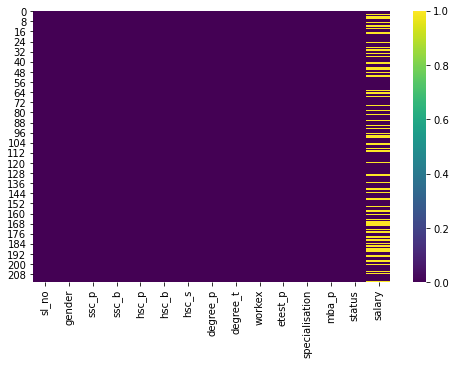

In [430]:
plt.figure(figsize=(8,5))
sns.heatmap(df.isnull(), cmap='viridis')

In [431]:
column=df.select_dtypes(include=['object'])
for col in column:
    display(df[col].value_counts())

M    139
F     76
Name: gender, dtype: int64

Central    116
Others      99
Name: ssc_b, dtype: int64

Others     131
Central     84
Name: hsc_b, dtype: int64

Commerce    113
Science      91
Arts         11
Name: hsc_s, dtype: int64

Comm&Mgmt    145
Sci&Tech      59
Others        11
Name: degree_t, dtype: int64

No     141
Yes     74
Name: workex, dtype: int64

Mkt&Fin    120
Mkt&HR      95
Name: specialisation, dtype: int64

Placed        148
Not Placed     67
Name: status, dtype: int64

## Exploring the dataset by each feature

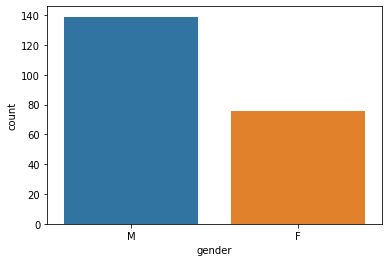

In [432]:
sns.countplot(x = df['gender'], data=df)

In [433]:
df.gender.value_counts()

M    139
F     76
Name: gender, dtype: int64

In [434]:
df.columns

Index(['sl_no', 'gender', 'ssc_p', 'ssc_b', 'hsc_p', 'hsc_b', 'hsc_s',
       'degree_p', 'degree_t', 'workex', 'etest_p', 'specialisation', 'mba_p',
       'status', 'salary'],
      dtype='object')

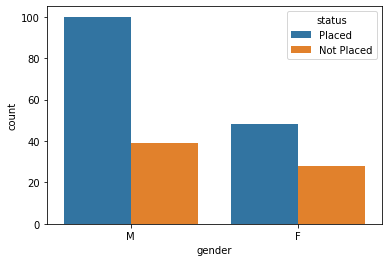

In [435]:
sns.countplot(x = df['gender'], hue = df['status'], data=df)

* By visualizing we can see that males have higher of getting placed as compared to females

In [436]:
df.head()

,sl_no,gender,ssc_p,ssc_b,hsc_p,hsc_b,hsc_s,degree_p,degree_t,workex,etest_p,specialisation,mba_p,status,salary
0,1,M,67.00,Others,91.00,Others,Commerce,58.00,Sci&Tech,No,55.0,Mkt&HR,58.80,Placed,270000.0
1,2,M,79.33,Central,78.33,Others,Science,77.48,Sci&Tech,Yes,86.5,Mkt&Fin,66.28,Placed,200000.0
2,3,M,65.00,Central,68.00,Central,Arts,64.00,Comm&Mgmt,No,75.0,Mkt&Fin,57.80,Placed,250000.0
3,4,M,56.00,Central,52.00,Central,Science,52.00,Sci&Tech,No,66.0,Mkt&HR,59.43,Not Placed,NaN
4,5,M,85.80,Central,73.60,Central,Commerce,73.30,Comm&Mgmt,No,96.8,Mkt&Fin,55.50,Placed,425000.0


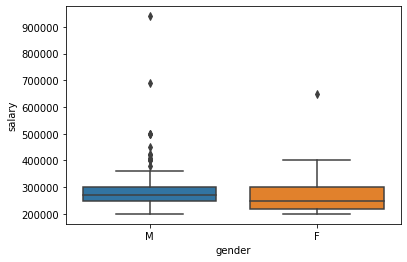

In [437]:
sns.boxplot(x = df['gender'], y = df['salary'], data=df)

In [438]:
df.groupby('gender')['salary'].mean()

gender
F    267291.666667
M    298910.000000
Name: salary, dtype: float64

* Males tends to have higher salary as compared to females.

In [439]:
df.columns

Index(['sl_no', 'gender', 'ssc_p', 'ssc_b', 'hsc_p', 'hsc_b', 'hsc_s',
       'degree_p', 'degree_t', 'workex', 'etest_p', 'specialisation', 'mba_p',
       'status', 'salary'],
      dtype='object')

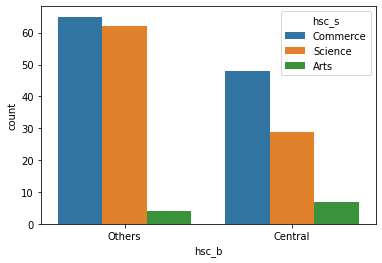

In [440]:
sns.countplot(x = df['hsc_b'], hue = df['hsc_s'], data=df)

Text(0.5, 1.0, 'MBA percentage')

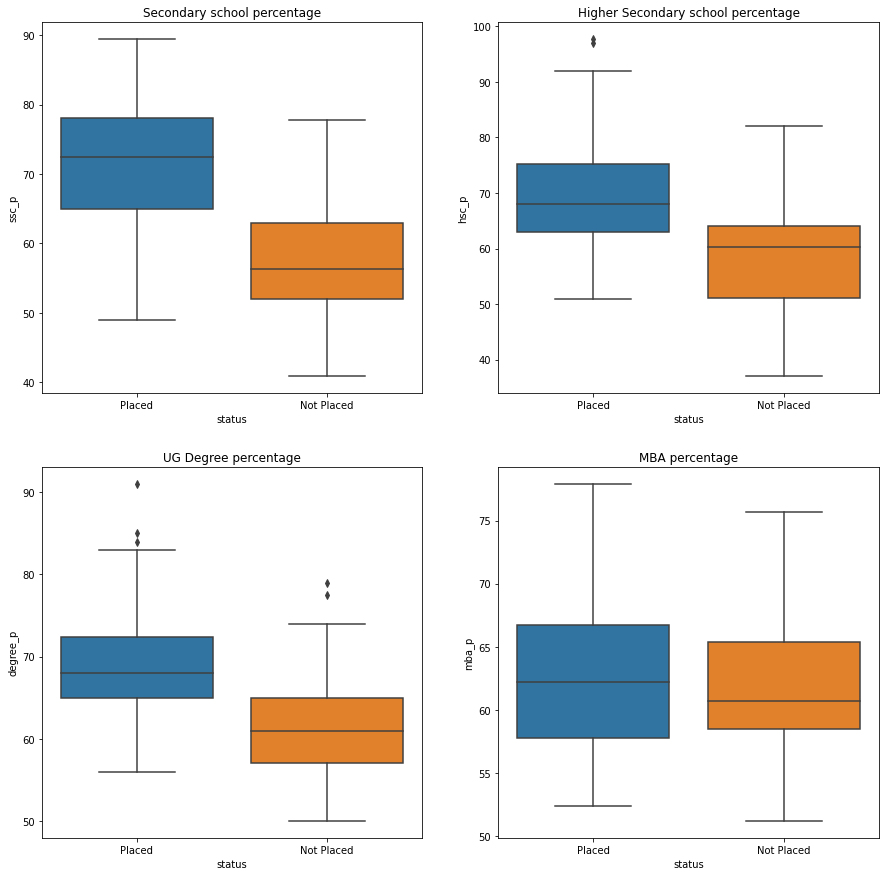

In [441]:
plt.figure(figsize = (15, 15))
ax=plt.subplot(221)
sns.boxplot(x='status',y='ssc_p',data=df)
ax.set_title('Secondary school percentage')
ax=plt.subplot(222)
sns.boxplot(x='status',y='hsc_p',data=df)
ax.set_title('Higher Secondary school percentage')
ax=plt.subplot(223)
sns.boxplot(x='status',y='degree_p',data=df)
ax.set_title('UG Degree percentage')
ax=plt.subplot(224)
sns.boxplot(x='status',y='mba_p',data=df)
ax.set_title('MBA percentage')


Text(0.5, 1.0, 'Gender vs Salary based on work experience')

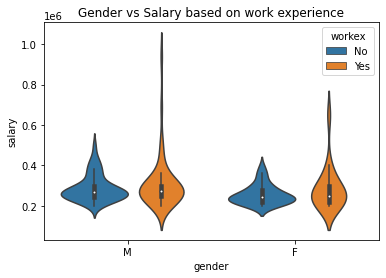

In [442]:
sns.violinplot(x = df['gender'], y = df['salary'], hue = df['workex'], data=df)
plt.title("Gender vs Salary based on work experience")

* It can be seen that people with work experience have higher chance to get placed

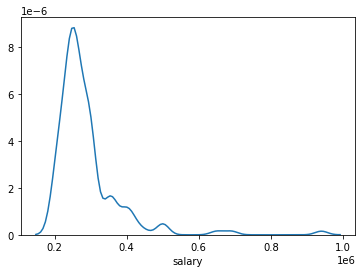

In [443]:
sns.distplot(df['salary'], bins=50, hist=False)

# Feature Engineering

In [444]:
df.head()

,sl_no,gender,ssc_p,ssc_b,hsc_p,hsc_b,hsc_s,degree_p,degree_t,workex,etest_p,specialisation,mba_p,status,salary
0,1,M,67.00,Others,91.00,Others,Commerce,58.00,Sci&Tech,No,55.0,Mkt&HR,58.80,Placed,270000.0
1,2,M,79.33,Central,78.33,Others,Science,77.48,Sci&Tech,Yes,86.5,Mkt&Fin,66.28,Placed,200000.0
2,3,M,65.00,Central,68.00,Central,Arts,64.00,Comm&Mgmt,No,75.0,Mkt&Fin,57.80,Placed,250000.0
3,4,M,56.00,Central,52.00,Central,Science,52.00,Sci&Tech,No,66.0,Mkt&HR,59.43,Not Placed,NaN
4,5,M,85.80,Central,73.60,Central,Commerce,73.30,Comm&Mgmt,No,96.8,Mkt&Fin,55.50,Placed,425000.0


In [445]:
df.drop(['sl_no', 'salary'], axis=1, inplace=True)

In [446]:
df.head()

,gender,ssc_p,ssc_b,hsc_p,hsc_b,hsc_s,degree_p,degree_t,workex,etest_p,specialisation,mba_p,status
0,M,67.00,Others,91.00,Others,Commerce,58.00,Sci&Tech,No,55.0,Mkt&HR,58.80,Placed
1,M,79.33,Central,78.33,Others,Science,77.48,Sci&Tech,Yes,86.5,Mkt&Fin,66.28,Placed
2,M,65.00,Central,68.00,Central,Arts,64.00,Comm&Mgmt,No,75.0,Mkt&Fin,57.80,Placed
3,M,56.00,Central,52.00,Central,Science,52.00,Sci&Tech,No,66.0,Mkt&HR,59.43,Not Placed
4,M,85.80,Central,73.60,Central,Commerce,73.30,Comm&Mgmt,No,96.8,Mkt&Fin,55.50,Placed


In [447]:
df['gender'] = df.gender.map({"M" : 0, "F" : 1})
df['ssc_b'] = df.ssc_b.map({"Other" : 0, "Central" : 1})
df['hsc_s'] = df.hsc_s.map({"Commerce" : 0, "Science" : 1, "Arts" : 2})
df['degree_t'] = df.degree_t.map({"Comm&Mgmt" : 0, "Sci&Tech" : 1, "Others" : 2})
df['workex'] = df.workex.map({"No" : 0, "Yes" :1})
df['specialisation'] = df.specialisation.map({"Mkt&Fin" : 0, "Mkt&HR" : 1})
df['status'] = df.status.map({"Not Placed" : 0, "Placed" : 1})

In [448]:
df.head()

,gender,ssc_p,ssc_b,hsc_p,hsc_b,hsc_s,degree_p,degree_t,workex,etest_p,specialisation,mba_p,status
0,0,67.00,NaN,91.00,Others,0,58.00,1,0,55.0,1,58.80,1
1,0,79.33,1.0,78.33,Others,1,77.48,1,1,86.5,0,66.28,1
2,0,65.00,1.0,68.00,Central,2,64.00,0,0,75.0,0,57.80,1
3,0,56.00,1.0,52.00,Central,1,52.00,1,0,66.0,1,59.43,0
4,0,85.80,1.0,73.60,Central,0,73.30,0,0,96.8,0,55.50,1


In [449]:
df.drop(['ssc_b'], axis=1, inplace=True)

In [450]:
df.drop(['hsc_b'], axis=1, inplace=True)

In [451]:
df.head()

,gender,ssc_p,hsc_p,hsc_s,degree_p,degree_t,workex,etest_p,specialisation,mba_p,status
0,0,67.00,91.00,0,58.00,1,0,55.0,1,58.80,1
1,0,79.33,78.33,1,77.48,1,1,86.5,0,66.28,1
2,0,65.00,68.00,2,64.00,0,0,75.0,0,57.80,1
3,0,56.00,52.00,1,52.00,1,0,66.0,1,59.43,0
4,0,85.80,73.60,0,73.30,0,0,96.8,0,55.50,1


# Correlation

* Correlation is a statistical term which show that how strongly the variables as correlated

* Positive correlation : If the value of one feature increases the value of other feature also increases

* Negative correlation : If the value of one feature increases the value of other feature decreases

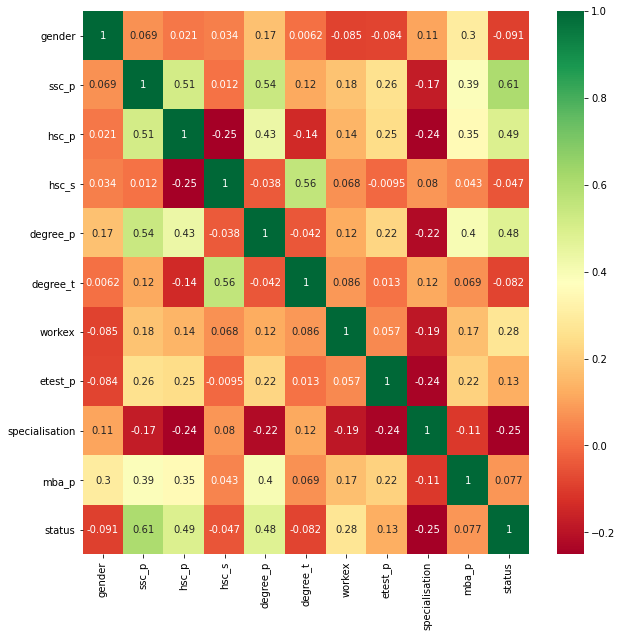

In [452]:
# Creating a correlation matrix

plt.figure(figsize=(10,10))

sns.heatmap(df.corr(), annot=True, cmap="RdYlGn")

# Feature Selection

* Feature Selection is the process where you automatically or manually select those features which contribute most to your prediction variable or output in which you are interested in.

*  Having irrelevant features in your data can decrease the accuracy of the models and make your model learn based on irrelevant features.

In [453]:
df.head()

,gender,ssc_p,hsc_p,hsc_s,degree_p,degree_t,workex,etest_p,specialisation,mba_p,status
0,0,67.00,91.00,0,58.00,1,0,55.0,1,58.80,1
1,0,79.33,78.33,1,77.48,1,1,86.5,0,66.28,1
2,0,65.00,68.00,2,64.00,0,0,75.0,0,57.80,1
3,0,56.00,52.00,1,52.00,1,0,66.0,1,59.43,0
4,0,85.80,73.60,0,73.30,0,0,96.8,0,55.50,1


In [454]:
# Seperating our variables into Independent and Dependent variables

X = df[['ssc_p', 'hsc_p', 'hsc_s', 'degree_p', 'degree_t','workex', 'specialisation', 'mba_p', 'etest_p']] # Indepepndent variables

y = df['status'] # Dependent variables



# Predicting the accuracy with the help of ann

In [455]:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import ReLU, LeakyReLU, PReLU, ELU

In [456]:
# Initialising the Ann
classifier = Sequential()

In [457]:
X_train.shape

(150, 9)

In [459]:
# Adding the hidden a layer and first input layer
classifier.add(Dense(units =20, kernel_initializer='he_uniform', activation = 'relu', input_dim=9 ))

In [460]:
# Adding the second hidden layer
classifier.add(Dense(units = 30, kernel_initializer = 'he_uniform', activation = 'relu'))

In [461]:
# Adding the third hidden layere
classifier.add(Dense(units = 15, kernel_initializer = 'he_uniform', activation = 'relu'))

In [462]:
# Adding the output layer
classifier.add(Dense(units = 1, kernel_initializer='glorot_uniform', activation = 'sigmoid'))

In [463]:
# Compiling the ANN
classifier.compile(optimizer='adam', loss='binary_crossentropy', metrics = ['accuracy'])

In [464]:
# Fitting the ANN to the training set
model_history = classifier.fit(X_train, y_train, validation_split=0.33, batch_size=10, nb_epoch = 30)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  


Train on 100 samples, validate on 50 samples
Epoch 1/30
100/100 [==============================] - 0s 2ms/step - loss: 22.2506 - accuracy: 0.7000 - val_loss: 18.7518 - val_accuracy: 0.6600
Epoch 2/30
100/100 [==============================] - 0s 260us/step - loss: 12.4564 - accuracy: 0.7000 - val_loss: 8.2347 - val_accuracy: 0.6600
Epoch 3/30
100/100 [==============================] - 0s 274us/step - loss: 4.2968 - accuracy: 0.5400 - val_loss: 3.8543 - val_accuracy: 0.2000
Epoch 4/30
100/100 [==============================] - 0s 270us/step - loss: 2.5094 - accuracy: 0.3900 - val_loss: 2.3549 - val_accuracy: 0.7000
Epoch 5/30
100/100 [==============================] - 0s 237us/step - loss: 2.0659 - accuracy: 0.6800 - val_loss: 1.6367 - val_accuracy: 0.6000
Epoch 6/30
100/100 [==============================] - 0s 250us/step - loss: 1.6035 - accuracy: 0.4200 - val_loss: 1.3587 - val_accuracy: 0.5600
Epoch 7/30
100/100 [==============================] - 0s 240us/step - loss: 1.5155 - accur

In [465]:
# Predicting the test set results
y_pred = classifier.predict(X_test)
y_pred = (y_pred > 0.5 )

In [466]:
from sklearn.metrics import confusion_matrix, accuracy_score
cm =  confusion_matrix(y_test, y_pred)
cm

array([[ 8, 12],
       [ 5, 40]])

In [467]:
score = accuracy_score(y_test, y_pred)
score.mean()

0.7384615384615385

### Hyper parameter Tuning To Decide Number of Hidden Layers in Neural Network

In [468]:
# Feature Scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x_train = sc.fit_transform(X_train)
x_test = sc.transform(X_test)

In [469]:
from keras.wrappers.scikit_learn import KerasClassifier
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from keras.activations import relu, sigmoid
from keras.layers import Activation, Dense
from keras.layers import Dropout

In [470]:
def create_model(layers, activation):
  model = Sequential()
  for i, nodes in enumerate(layers):
    if i == 0:
         model.add(Dense(nodes, input_dim = x_train.shape[1]))
         model.add(Activation(activation))
         model.add(Dropout(0.3))

    else:
         model.add(Dense(nodes))
         model.add(Activation(activation))
         model.add(Dropout(0.3))

  model.add(Dense(units = 1, kernel_initializer='glorot_uniform',activation='sigmoid'))

  model.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics=['accuracy'])
  return model

In [471]:
model = KerasClassifier(build_fn=create_model, verbose=0)

In [472]:
layers = [(20), (40,20), (45, 30, 15)]
activations = ['sigmoid', 'relu']

In [477]:
param_grid = dict(layers=layers, activation=activations, batch_size = [128, 256], epochs=[30,50,100])

In [478]:
grid = RandomizedSearchCV(estimator=model, param_distributions=param_grid, cv=5)

In [479]:
grid_result = grid.fit(x_train, y_train)

/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
TypeError: 'int' object is not iterable

  FitFailedWarning)


In [480]:
print(grid_result.best_score_, grid_result.best_params_)

0.8599999904632568 {'layers': (45, 30, 15), 'epochs': 100, 'batch_size': 256, 'activation': 'relu'}
